<h1>TABLE OF CONTENTS</h1>
<div>
    1. Business Problem <br>
    2. Import Required Modules <br>
    3. Read in Dataset <br>
    4. Data Preperation <br>
    &emsp;&emsp;4.1 Handle Missing Values <br>
    &emsp;&emsp;4.2 Keep Necessary Columns <br>
    5. Exploratory Data Analysis <br>
    &emsp;&emsp;5.1 DayOfWeek vs ArrDelay <br>
    &emsp;&emsp;5.2 DayofMonth vs ArrDelay <br>
    &emsp;&emsp;5.3 Origin and Destination vs ArrDelay<br>
    6. Predictive Modelling <br>
    &emsp;&emsp;6.1 Data Engineering <br>
    &emsp;&emsp;6.2 Model Construction <br>
    &emsp;&emsp;&emsp;&emsp;6.2.1 Model Selection <br>
    &emsp;&emsp;&emsp;&emsp;6.2.2 Divide into train and test <br>
    &emsp;&emsp;&emsp;&emsp;6.2.3 Decision Tree <br>
    &emsp;&emsp;&emsp;&emsp;6.2.4 Linear Regression <br>
    &emsp;&emsp;&emsp;&emsp;6.2.5 Decision Tree Regression <br>
    &emsp;&emsp;&emsp;&emsp;6.2.6 Gradient Boosting Regression <br>
    &emsp;&emsp;&emsp;&emsp;6.2.7 Accuracy of the Model <br>
    &emsp;&emsp;6.3 Result <br>
    7. Business Insight <br>
<div>


<h2>Business Problem</h2>
<br>
We are developing a predictive model that can help us predict the total amount of delay before the flight takes off. This prediction is based on factors excluding the flight time delays like origin, day, distance, delay history, etc. This can help airline companies as well as the department of transportation to take precautions even before the departure of the flight.
Here, we are using the airline data from the airlines flying in USA. The objective of the task is to understand which model is the most suitable one to use to get a good accuracy while predicting the delay. Also, need to work on understanding what factors majorly affect the airline delay time. 

<h2>Import Required Modules</h2>

In [34]:
# DataFrame
import pandas as pd
import numpy as np

#Visualisation and statistics method
import seaborn as sns
import matplotlib.pyplot as plt

# Data Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# train_test_split
from sklearn.model_selection import train_test_split

# Machine Learning Model
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

<h2>Read in Dataset</h2>
<br>
Reading the dataset and a brief summary of the dataset.

In [35]:
# Data stored under the 'Downloads' folder in the system
airData = pd.read_csv('~/dataAnalytics.csv', na_values = 'NA')
airData.info()
airData.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379384 entries, 0 to 379383
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                379384 non-null  int64  
 1   Month               379384 non-null  int64  
 2   DayofMonth          379384 non-null  int64  
 3   DayOfWeek           379384 non-null  int64  
 4   Operating_Airline   379384 non-null  object 
 5   OriginAirportID     379384 non-null  int64  
 6   Origin              379384 non-null  object 
 7   OriginCityName      379384 non-null  object 
 8   DestAirportID       379384 non-null  int64  
 9   Dest                379384 non-null  object 
 10  DestCityName        379384 non-null  object 
 11  DepDelay            375358 non-null  float64
 12  DepDel15            375358 non-null  float64
 13  ArrDelay            374609 non-null  float64
 14  ArrDelayMinutes     374609 non-null  float64
 15  ArrDel15            374609 non-nul

,Year,Month,DayofMonth,DayOfWeek,Operating_Airline,OriginAirportID,Origin,OriginCityName,DestAirportID,Dest,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,379384.0,379384.0,379384.000000,379384.000000,379384,379384.000000,379384,379384,379384.000000,379384,...,374609.000000,374609.000000,379384.0,379384.000000,379384.000000,36949.000000,36949.000000,36949.000000,36949.000000,36949.000000
unique,NaN,NaN,NaN,NaN,22,NaN,366,360,NaN,366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,WN,NaN,ATL,"Atlanta, GA",NaN,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,61307,NaN,22313,22313,NaN,22322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2021.0,1.0,15.705681,4.252538,NaN,12642.601001,NaN,NaN,12642.598491,NaN,...,132.605207,109.490869,1.0,775.315859,3.576158,26.431270,6.778857,16.811199,0.210371,15.672305
std,0.0,0.0,9.077357,2.032060,NaN,1549.712920,NaN,NaN,1549.699888,NaN,...,67.754381,67.050124,0.0,556.936865,2.194020,79.533058,54.191549,38.592067,4.836052,53.003492
min,2021.0,1.0,1.000000,1.000000,NaN,10135.000000,NaN,NaN,10135.000000,NaN,...,16.000000,8.000000,1.0,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,1.0,8.000000,2.000000,NaN,11292.000000,NaN,NaN,11292.000000,NaN,...,83.000000,60.000000,1.0,366.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.0,1.0,16.000000,4.000000,NaN,12478.000000,NaN,NaN,12478.000000,NaN,...,118.000000,94.000000,1.0,639.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,2021.0,1.0,24.000000,6.000000,NaN,14057.000000,NaN,NaN,14057.000000,NaN,...,164.000000,140.000000,1.0,1020.000000,5.000000,24.000000,0.000000,21.000000,0.000000,7.000000


<h2>Data Preperation</h2>


<h3>Handle Missing Values</h3>

In [36]:
# The code gives the sum of total number of N/A values present in each columns
airData.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
Operating_Airline          0
OriginAirportID            0
Origin                     0
OriginCityName             0
DestAirportID              0
Dest                       0
DestCityName               0
DepDelay                4026
DepDel15                4026
ArrDelay                4775
ArrDelayMinutes         4775
ArrDel15                4775
Cancelled                  0
Diverted                   0
CRSElapsedTime             0
ActualElapsedTime       4775
AirTime                 4775
Flights                    0
Distance                   0
DistanceGroup              0
CarrierDelay          342435
WeatherDelay          342435
NASDelay              342435
SecurityDelay         342435
LateAircraftDelay     342435
dtype: int64

'DepDelay', 'DepDel15', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ActualElapsedTime', 'AirTime' have null values because these rows correspond to the flights which were 'cancelled' or 'diverted'. 'Cancelled' and 'Diverted' with a value of 1, does not affect the 'ArrDelay' value.

In [37]:
# 'airData' DataFrame is altered here depending on the value of 'cancelled' and 'Diverted' 
airData = airData[airData.Cancelled != 1] # Rows with 'Cancelled' value not equal to 1 is not deleted
airData = airData[airData.Diverted != 1] # Rows with 'Diverted' value not equal to 1 is not deleted
airData.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
Operating_Airline          0
OriginAirportID            0
Origin                     0
OriginCityName             0
DestAirportID              0
Dest                       0
DestCityName               0
DepDelay                   0
DepDel15                   0
ArrDelay                   0
ArrDelayMinutes            0
ArrDel15                   0
Cancelled                  0
Diverted                   0
CRSElapsedTime             0
ActualElapsedTime          0
AirTime                    0
Flights                    0
Distance                   0
DistanceGroup              0
CarrierDelay          337660
WeatherDelay          337660
NASDelay              337660
SecurityDelay         337660
LateAircraftDelay     337660
dtype: int64

<h3>Keep Necessary Columns</h3>
<br>
The model is based on factors before the flight takes off. Any data related to flight during flight time is not necessary for the model.

The model we are working on is based on factors that are not related to flight time. Errors due to human error or document delay caused due to humans while working at the airport is where the model is focusing on.

Here, we will be just focusing on 'DayofMonth', 'DayOfWeek', 'Origin', 'Dest'(Destination), 'DepDelay'(Departure Delay), 'ArrDelay'(Arrival Delay), 'AirTime', 'Operating_Airline' and 'Distance'

In [38]:
# altering the DataFrame by reassigning the variable with the values that are required for the model
airData = airData[['DayofMonth']+['DayOfWeek']+['Origin']+['Operating_Airline ']+['Dest']+['DepDelay']+['ArrDelay']+['AirTime']+['Distance']]
airData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374609 entries, 0 to 379383
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DayofMonth          374609 non-null  int64  
 1   DayOfWeek           374609 non-null  int64  
 2   Origin              374609 non-null  object 
 3   Operating_Airline   374609 non-null  object 
 4   Dest                374609 non-null  object 
 5   DepDelay            374609 non-null  float64
 6   ArrDelay            374609 non-null  float64
 7   AirTime             374609 non-null  float64
 8   Distance            374609 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 28.6+ MB


In [39]:
# Detailed analysis on each columns in the DataFrame
airData.describe(include = 'all')

,DayofMonth,DayOfWeek,Origin,Operating_Airline,Dest,DepDelay,ArrDelay,AirTime,Distance
count,374609.000000,374609.000000,374609,374609,374609,374609.000000,374609.000000,374609.000000,374609.000000
unique,NaN,NaN,366,22,366,NaN,NaN,NaN,NaN
top,NaN,NaN,ATL,WN,ATL,NaN,NaN,NaN,NaN
freq,NaN,NaN,22229,60587,22268,NaN,NaN,NaN,NaN
mean,15.668043,4.244345,NaN,NaN,NaN,1.928790,-5.222584,109.490869,776.714537
std,9.042713,2.029813,NaN,NaN,NaN,40.378762,42.572373,67.050124,557.488910
min,1.000000,1.000000,NaN,NaN,NaN,-75.000000,-86.000000,8.000000,31.000000
25%,8.000000,2.000000,NaN,NaN,NaN,-7.000000,-20.000000,60.000000,366.000000
50%,16.000000,4.000000,NaN,NaN,NaN,-5.000000,-11.000000,94.000000,640.000000
75%,24.000000,6.000000,NaN,NaN,NaN,-1.000000,-1.000000,140.000000,1021.000000


<h2>Exploratory Data Analysis</h2>

<h3>DayOfWeek vs ArrDelay</h3>

Here, using scatter plot to understand the variations of the arrival delay against the day of the week with respect to the individual airlines.

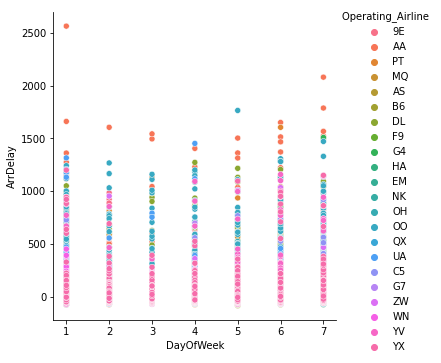

In [40]:
# Using seaborn library to plot the graph
sns.relplot(data = airData, kind = 'scatter', x = 'DayOfWeek', y = 'ArrDelay', hue = 'Operating_Airline ')
plt.show()

Here, you can see that depending on the day of the week, there are variations in the value of arrival delay. This can be due to how busy it can get during weekdays and weekends. I have also used hue to depict the variations based on the individual airlines.

<h3>DayofMonth vs ArrDelay</h3>


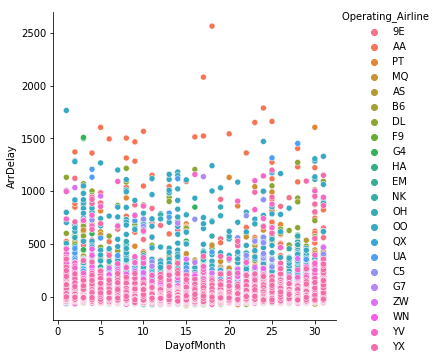

In [41]:
# Using scatter plot to better show the variations here
sns.relplot(data = airData, kind = 'scatter', x = 'DayofMonth', y = 'ArrDelay', hue = 'Operating_Airline ')
plt.show()

Airlines 'WN', 'YV', 'YX' is showing a consistent values less than 5 min in terms of arrival delay. 'AA' is showing extreme variations in terms of arrival delay with values more than 15 min. The graph is showing variations depending on the day of the month. Since variations are showcased depending on the day of the month, we can use 'DayofMonth' in the model to predict the arrival delay.

<h3>Origin and Destination vs ArrDelay</h3>

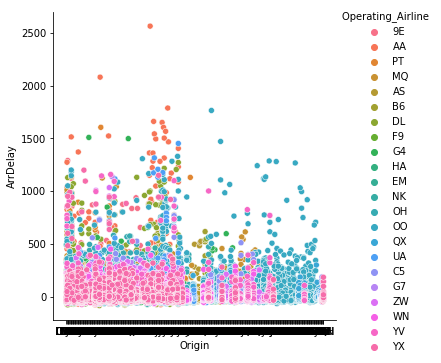

In [42]:
# scatter relational plot is the best kind to showcase the variations
sns.relplot(data = airData, kind = 'scatter', x = 'Origin', y = 'ArrDelay', hue = 'Operating_Airline ')
plt.show()

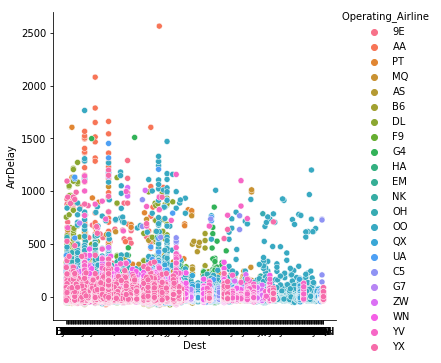

In [43]:
# scatter relational plot is the best kind to showcase the variations
sns.relplot(data = airData, x = 'Dest', y = 'ArrDelay', hue = 'Operating_Airline ')
plt.show()

Variations based on origin and destination shows us the need to add these features in the model. 

In the next three plots, I am gonna showcase the variations Departure delay, Air time and Distance has against arrival Delay.

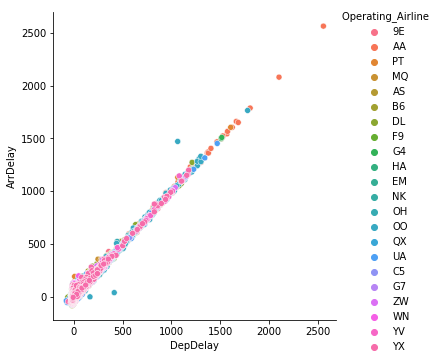

In [44]:
# Departure Delay vs Arrival Delay
# scatter relational plot is the best kind to showcase the variations
sns.relplot(data = airData, kind = 'scatter', x = 'DepDelay', y = 'ArrDelay', hue = 'Operating_Airline ')
plt.show()

Even though the variations in departure delay vs arrival delay is very less, we can use this to increase the variation of the model.

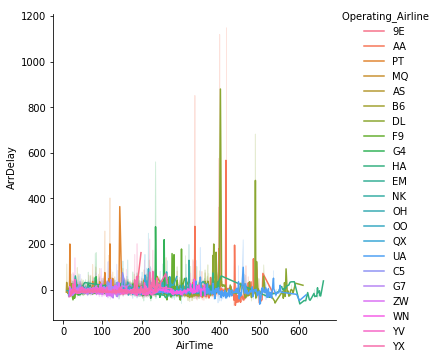

In [45]:
# Airtime vs Arrival Delay
# line relational plot is the best kind to showcase the variations
sns.relplot(data = airData, kind = 'line', x = 'AirTime', y = 'ArrDelay', hue = 'Operating_Airline ')
plt.show()

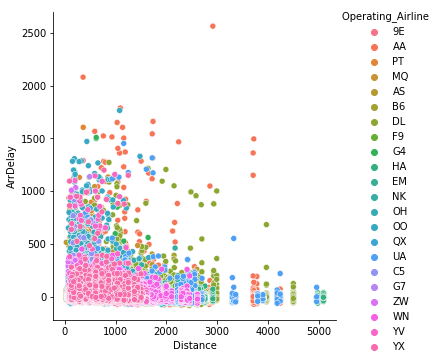

In [46]:
# Distance vs Arrival Delay
# line relational plot is best way to showcase the variations 
sns.relplot(data = airData, kind = 'scatter', x = 'Distance', y = 'ArrDelay', hue = 'Operating_Airline ')
plt.show()

<h2>Predictive Modeling</h2>

<h3>Data Engineering</h3>

Since the dataset contains string type data which should be categorical to create the model, we need to alter the data to make it machine recognisable. Some columns also needs to be normalized/standardized.

<div> 1. MinMaxScalar to normalize the data, which in turn increases the accuracy.
<br> 2. OneHot encoder to convert string data into categorical machine recognisable data.
</div>

In [47]:
airData.describe(include = 'all')

,DayofMonth,DayOfWeek,Origin,Operating_Airline,Dest,DepDelay,ArrDelay,AirTime,Distance
count,374609.000000,374609.000000,374609,374609,374609,374609.000000,374609.000000,374609.000000,374609.000000
unique,NaN,NaN,366,22,366,NaN,NaN,NaN,NaN
top,NaN,NaN,ATL,WN,ATL,NaN,NaN,NaN,NaN
freq,NaN,NaN,22229,60587,22268,NaN,NaN,NaN,NaN
mean,15.668043,4.244345,NaN,NaN,NaN,1.928790,-5.222584,109.490869,776.714537
std,9.042713,2.029813,NaN,NaN,NaN,40.378762,42.572373,67.050124,557.488910
min,1.000000,1.000000,NaN,NaN,NaN,-75.000000,-86.000000,8.000000,31.000000
25%,8.000000,2.000000,NaN,NaN,NaN,-7.000000,-20.000000,60.000000,366.000000
50%,16.000000,4.000000,NaN,NaN,NaN,-5.000000,-11.000000,94.000000,640.000000
75%,24.000000,6.000000,NaN,NaN,NaN,-1.000000,-1.000000,140.000000,1021.000000


Distance has a mean value of 557 which is 10 times higher than the mean of other features. This causes a disruption as well as reduce the accuracy of the model. By standardizing the data using MinMaxScalar, we can reduce the disruption as well as increase the accuracy of the model.

In [48]:
# Standardizing the distance feature using MinMaxScalar
scaler = MinMaxScaler()
airData['Distance'] = scaler.fit_transform(airData[['Distance']]) # replacing the standardized value in the dataFrame

In [49]:
# Origin and Destination feature contains string values
# We use OneHotEncoder to classify Origin and Destination numerically
enc = OneHotEncoder()
temp = airData[['DayofMonth']+['DayOfWeek']+['Origin']+['Dest']+['DepDelay']+['AirTime']+['Distance']]
temp = enc.fit_transform(temp)

<h3>Model Construction</h3>

<h4>Model Selection</h4>

Since I have to predict a numerical value using 6 features which is a mixture of classification variable and continuous variables, we are going to try using 
<br>    1. Linear Regression
<br>    2. Decision Tree Regression
<br>    3. Random Forest Regression<br>
We will compare the accuracy of the three models to understand which model best suits the prediction of arrival delay.

<h4>Divide into Train/Test Dataset</h4>

In [50]:
# Build a training dataset with 60% training data and 40% testing data
# Using random state to make sure the results remain the same 
X = temp
Y = airData[['ArrDelay']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 1)

<h4>Linear Regression</h4>

In [51]:
# Using linear regression model 
res = linear_model.LinearRegression()
res.fit(X_train, Y_train)

LinearRegression()

In [52]:
# Calculating the mean absolute error, mean squared error and R2_score
Y_pred = res.predict(X_test)
print('mean absolute error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('mean squared error:',metrics.mean_squared_error(Y_test, Y_pred))
print("R2_score: %.2f" % (r2_score(Y_test, Y_pred)*100))

mean absolute error: 7.732139826678548
mean squared error: 384.58275920311434
R2_score: 78.69


<h4>DecisionTree Regression</h4>

In [53]:
# Building Decision Tree Regression Model
tr = DecisionTreeRegressor()
tr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [54]:
# Calculating the mean absolute error, mean squared error and R2_score
Y_pred = tr.predict(X_test)
print('mean absolute error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('mean squared error:',metrics.mean_squared_error(Y_test, Y_pred))
print("R2_score: %.2f" % (r2_score(Y_test, Y_pred)*100))

mean absolute error: 12.45023268643834
mean squared error: 655.5225063695874
R2_score: 63.67


<h4>Gradient Boosting Regression</h4>

In [55]:
# Building Gradient Boosting Regression Model
rand = GradientBoostingRegressor()
rand.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [56]:
# Calculating the mean absolute error, mean squared error and R2_score
Y_pred = rand.predict(X_test)
print('mean absolute error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('mean squared error:',metrics.mean_squared_error(Y_test, Y_pred))
print("R2_score: %.2f" % (r2_score(Y_test, Y_pred)*100))

mean absolute error: 16.645680294047203
mean squared error: 1723.637576365453
R2_score: 4.48


<h2>Result</h2>

Through the use of linear regression model, decision tree regression model and gradient boosting model, we have evaluated each models using the dataset. Here you can see that the R2_score is the highest and mean squared value is the lowest for linear regression model. 

<h2>Business Insight</h2>

The predictive model I came up with could utilize the external data or features to predict the acccurate arrival delay of the flight. This means that the factors affecting the flight delay include the arrival airport, departure airport, distance between the airport, airtime, day of the weekn and day of the month. This can help in airlines to predict the air delay even before the flight takes off. 